### 关于梯度的调试

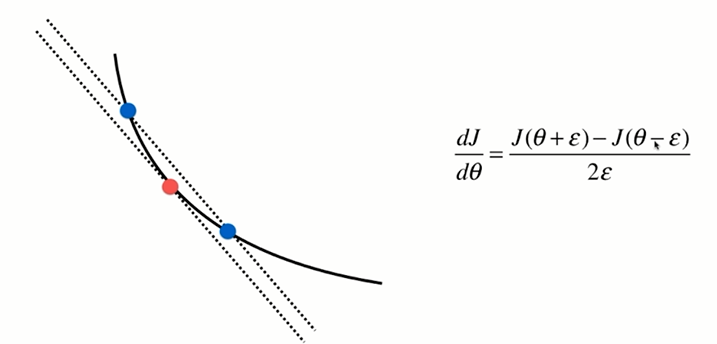

如果theta是一个向量

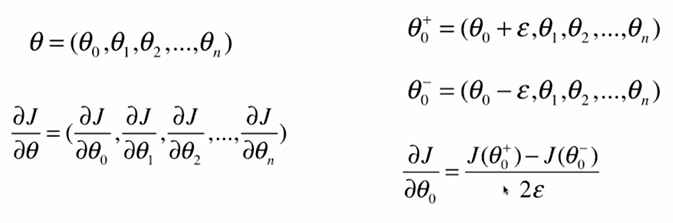

同理，如果求对theta1的导数

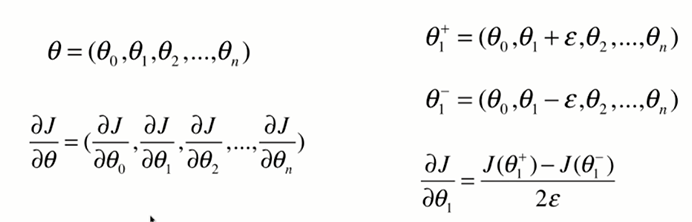

依次类推即可。。。。。

### 对上面的公式 进行代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(88)
X = np.random.random(size=(1000, 10))

模拟一个y值

In [3]:
true_theta = np.arange(1, 12, dtype=float)

In [4]:
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [5]:
X.shape

(1000, 10)

In [6]:
y.shape

(1000,)

In [7]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

求解的损失函数

In [8]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

求在这点的theta左右的梯度是什么

In [9]:
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) *2. / len(y)

适用于所有的函数，完全是可以复用的，不像上面这个函数，只适用于当前的任务

In [10]:
def dJ_debuge(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        
        theta1 = theta.copy()
        theta1[i] += epsilon
        
        theta2 = theta.copy()
        theta2[i] -= epsilon
        
        res[i] = (J(theta1, X_b, y) - J(theta2,X_b, y) )/ (2*epsilon)
    return res

In [11]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

In [12]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debuge,X_b,y,initial_theta,eta)
theta

Wall time: 5.91 s


In [14]:
%time theta = gradient_descent(dJ_math,X_b,y,initial_theta,eta)

Wall time: 805 ms


In [15]:
theta

array([ 1.06539241,  2.0504484 ,  3.02187716,  3.87838888,  5.2496511 ,
        5.87328121,  6.98235792,  7.95820221,  8.92056251,  9.99613365,
       10.98105068])